[Reference](https://ankitbagga.medium.com/how-to-predict-sales-using-machine-learning-58b9ef57e4a2)

In [18]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.5 MB/s 
     |████████████████████████████████| 9.8 MB 50.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pandas.tseries.offsets import DateOffset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AnkitBagga31/Timeseries_SARIMAX/main/sales.csv", parse_dates = True, index_col = "date")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


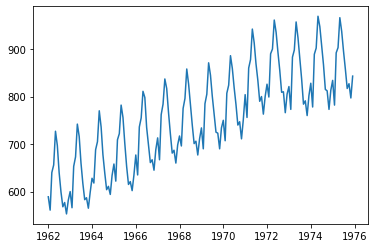

In [4]:
plt.plot(df["sales"])
plt.show()

In [5]:
df.shape

(168, 1)

In [6]:
adfuller(df.iloc[:,0].values)

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [7]:
df_diff = df.diff().dropna()

In [8]:
adfuller(df_diff.iloc[:,0].values)

(-3.0549955586531095,
 0.0300680040017824,
 14,
 152,
 {'1%': -3.474120870218417,
  '10%': -2.5770126333102494,
  '5%': -2.880749791423677},
 1107.6745114331075)

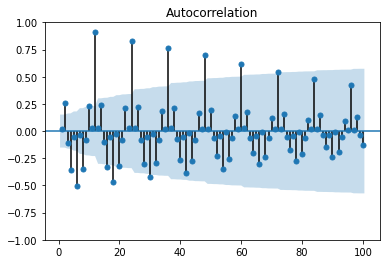

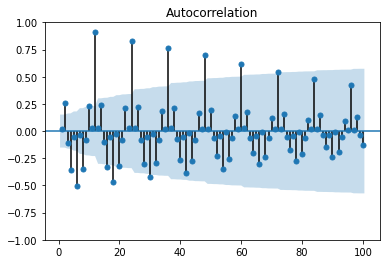

In [9]:
plot_acf(df_diff, lags = 100, zero = False)

In [10]:
results = pm.auto_arima(df, seasonal = True, m = 12, d = 1, D = 1, information_criterion = "bic", trace = True, error_action = "ignore", n_fits = 100, stepwise = True)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=1091.526, Time=3.74 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1123.012, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=1090.714, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=1075.427, Time=0.87 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1121.082, Time=0.29 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=1080.203, Time=1.20 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=1080.150, Time=2.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=1091.253, Time=0.50 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=inf, Time=8.52 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=1078.367, Time=0.37 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=1080.238, Time=1.25 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=1079.970, Time=1.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=1075.337, Time=1.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=1120.932, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Mon, 14 Mar 2022   AIC                           1066.207
Time:                                      11:48:31   BIC                           1075.337
Sample:                                           0   HQIC                          1069.916
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

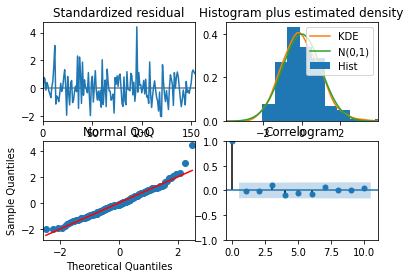

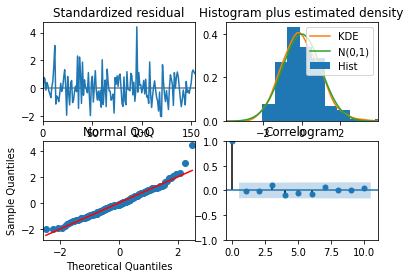

In [12]:
results.plot_diagnostics()

In [14]:
train, test = train_test_split(df, test_size =0.3)
test.shape

(51, 1)

In [15]:
prediction = pd.DataFrame(results.predict(n_periods = 51), test.index)
prediction.columns = ["predicted_sales"]
test["predicted_sales"] = prediction

In [16]:
test

,sales,predicted_sales
date,,
1971-10-01,800.0,865.349739
1971-11-01,763.0,818.387706
1971-12-01,800.0,925.019489
1972-01-01,826.0,938.096591
1972-02-01,799.0,1001.238546
1972-03-01,890.0,973.830260
1972-04-01,900.0,932.477681
1972-05-01,961.0,892.889158
1972-06-01,935.0,846.994443


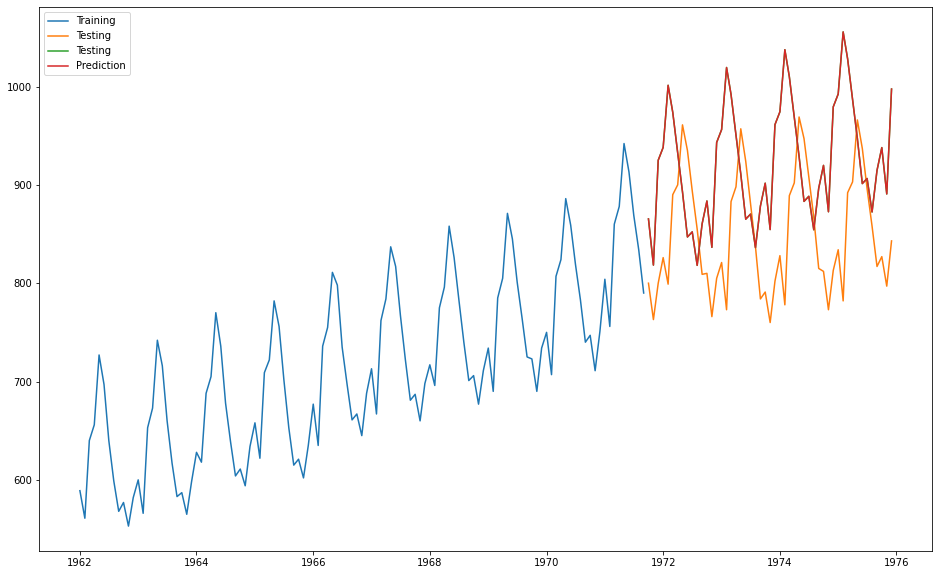

In [17]:
plt.figure(figsize = (16,10))
plt.plot(train, label = "Training")
plt.plot(test, label = "Testing")
plt.plot(prediction, label = "Prediction")
plt.legend()

In [18]:
df.shape

(168, 1)

In [21]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [24]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [25]:
future_date_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [26]:
future_date_df.tail()

,sales
1977-07-01,NaN
1977-08-01,NaN
1977-09-01,NaN
1977-10-01,NaN
1977-11-01,NaN


In [27]:
future_date_df.shape

(23, 1)

In [28]:
future_date_df["forecast"] = results.predict(n_periods = 23,dynamic  = True )

In [29]:
future_df = pd.concat([df,future_date_df])
future_df

,sales,forecast
1962-01-01,589.0,NaN
1962-02-01,561.0,NaN
1962-03-01,640.0,NaN
1962-04-01,656.0,NaN
1962-05-01,727.0,NaN
...,...,...
1977-07-01,NaN,950.570617
1977-08-01,NaN,910.982068
1977-09-01,NaN,865.087359
1977-10-01,NaN,870.259119


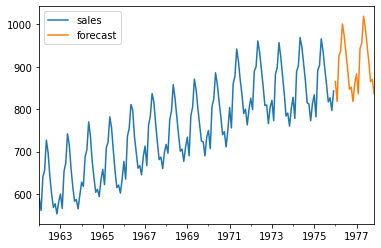

In [30]:
future_df.plot()